In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system

In [ ]:
# import necessary packages
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from transformers import CLIPProcessor, CLIPModel
from torch.utils.data import DataLoader, Dataset
from torch import nn, optim
from tqdm import tqdm

In [ ]:
# this is a helper function that returns the paths to the images I have in colab
def image_paths(local_download_path):
  file_paths = []

  for filename in os.listdir(local_download_path):
      if filename.endswith("jpg") or filename.endswith("png"):
          file_paths.append(local_download_path + filename)

  return file_paths

In [ ]:
augmented_paths = image_paths('/content/drive/MyDrive/Logos/Small_Dataset/')
print(len(augmented_paths))

14686


In [ ]:
k = len('/content/drive/MyDrive/Logos/Small_Dataset/')
folder_path = "/content/"

for path in augmented_paths:
  name = folder_path + path[k:]
  img = Image.open(path)
  img.save(name)
  print(f'Saved as: {name}')

Streaming output truncated to the last 5000 lines.
Saved as: /content/3540357656_logo2.jpg
Saved as: /content/3540357656_logo3.jpg
Saved as: /content/3540357656_logo4.jpg
Saved as: /content/3540357656_logo5.jpg
Saved as: /content/3540357656_logo6.jpg
Saved as: /content/3540357656_logo7.jpg
Saved as: /content/3540357656_logo8.jpg
Saved as: /content/3540357656_logo9.jpg
Saved as: /content/3540525615_logo0.jpg
Saved as: /content/3540525615_logo1.jpg
Saved as: /content/3540525615_logo2.jpg
Saved as: /content/3540525615_logo3.jpg
Saved as: /content/3540525615_logo4.jpg
Saved as: /content/3540525615_logo5.jpg
Saved as: /content/3540525615_logo6.jpg
Saved as: /content/3540525615_logo7.jpg
Saved as: /content/3540525615_logo8.jpg
Saved as: /content/3540525615_logo9.jpg
Saved as: /content/305_logo0.jpg
Saved as: /content/305_logo1.jpg
Saved as: /content/305_logo2.jpg
Saved as: /content/305_logo3.jpg
Saved as: /content/305_logo4.jpg
Saved as: /content/305_logo5.jpg
Saved as: /content/305_logo6.jp

In [ ]:
# helper function to strip the band's ID from the file name
def id_stripper(file_name, file_path):
  band_id = []
  i = len(file_path)
  while file_name[i] != '_':
    band_id.append(file_name[i])
    i+=1
  return ''.join(band_id)

In [ ]:
bands_df = pd.read_csv('/content/drive/MyDrive/Logos/metallum_bands.csv', low_memory=False)
bands_df.head()

,Band ID,Name,Country,Genre
0,3540442600,A // Solution,United States,Crust Punk/Thrash Metal
1,3540525193,A Black Cold Diamond,Colombia,Heavy/Doom Metal
2,3540473101,A Billion Limbs,United Kingdom,Groove Metal/Deathcore
3,3540535978,A Band Named Jon,United States,Brutal Death Metal/Grindcore
4,3540352307,A Balance of Power,United States,Melodic Death Metal/Metalcore


In [ ]:
#this will return the (image, label) pair for any of image
def get_label(img, df = bands_df):
  id = id_stripper(img, '/content/')

  row = df[df.isin([id]).any(axis=1)]
  name = row['Name'].iloc[0]
  genre = row['Genre'].iloc[0]
  location = row['Country'].iloc[0]

  label = (f"This is an image of the logo for {str(name)},"
        f" who are a {str(genre)} band from {str(location)}."
        f" The band ID for this band is {str(id)}.")

  return label

Label: This is an image of the logo for 200 Stab Wounds, who are a Death Metal band from United States. The band ID for this band is 3540465014.
Logo: 


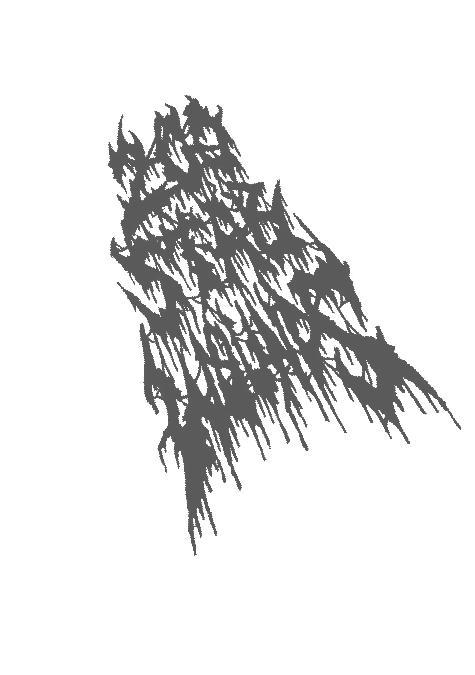

In [ ]:
# test it
test_label = get_label('/content/3540465014_logo2.jpg')
print(f'Label: {test_label}')
print('Logo: ')
img = Image.open('/content/3540465014_logo2.jpg')
display(img)

In [ ]:
img_paths = image_paths('/content/')
labels = []
for path in img_paths:
  labels.append((path, get_label(path)))
  print(f'Path: {path}')
  print(f' Label: {get_label(path)}')

labelled_pairs_df = pd.DataFrame(labels, columns=['Image', 'Caption'])
labelled_pairs_df.to_csv('image_caption_pairs.csv', index=False)

Streaming output truncated to the last 5000 lines.
Path: /content/3540457850_logo0.jpg
 Label: This is an image of the logo for Black Curse, who are a Death/Black Metal band from United States. The band ID for this band is 3540457850.
Path: /content/3540349442_logo1.jpg
 Label: This is an image of the logo for Zoofagus, who are a Technical Death Metal band from Ukraine. The band ID for this band is 3540349442.
Path: /content/3540438795_logo15.jpg
 Label: This is an image of the logo for Invader, who are a Heavy Metal band from International. The band ID for this band is 3540438795.
Path: /content/602_logo12.jpg
 Label: This is an image of the logo for Mystifier, who are a Black/Death Metal band from Brazil. The band ID for this band is 602.
Path: /content/3540502059_logo9.jpg
 Label: This is an image of the logo for Ulthar, who are a Black/Folk/Post-Metal band from United States. The band ID for this band is 3540502059.
Path: /content/3540368128_logo9.jpg
 Label: This is an image of th

In [ ]:
labelled_pairs_df = pd.read_csv('/content/drive/MyDrive/Logos/image_caption_pairs.csv')
labelled_pairs_df.head()

,Image,Caption
0,/content/14732_logo4.jpg,This is an image of the logo for Mitochondrion...
1,/content/11329_logo3.jpg,This is an image of the logo for Darkened Noct...
2,/content/93967_logo_c_03.jpg,"This is an image of the logo for Revenge, who ..."
3,/content/36065_logo5.jpg,This is an image of the logo for Obscure Infin...
4,/content/3540399380_logo16.jpg,"This is an image of the logo for Прометей, who..."


In [ ]:
print(len(labelled_pairs_df))

14686


In [ ]:
path = '/content/drive/MyDrive/Logos/'
labelled_pairs_df.to_csv(path + 'image_caption_pairs.csv', index=False)


In [ ]:
# path to my model files
model_dir = "/content/drive/MyDrive/best_model_epoch_20"

# load the model and processor from the directory
model = CLIPModel.from_pretrained(model_dir)
processor = CLIPProcessor.from_pretrained(model_dir)

# send the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# initialize the processor
processor = CLIPProcessor.from_pretrained(model_dir)

# check if the model is loaded successfully
print(model)

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
print(device)

cuda


In [ ]:
import pandas as pd

# i want to check to see how many of each class I have
class_counts = labelled_pairs_df['Caption'].value_counts()

count = 0
for i in range(90):
  print(str(i) + ' ' + str(len(class_counts[class_counts == i])))
  count += len(class_counts[class_counts == i])

print(count)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 203
21 0
22 483
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 0
51 0
52 0
53 0
54 0
55 0
56 0
57 0
58 0
59 0
60 0
61 0
62 0
63 0
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 0
75 0
76 0
77 0
78 0
79 0
80 0
81 0
82 0
83 0
84 0
85 0
86 0
87 0
88 0
89 0
686


In [ ]:
# next we'll make out dataset class and get the dataloaders ready
class LogoDataset(Dataset):
    def __init__(self, dataframe, processor, max_length=77):
        self.dataframe = dataframe
        self.processor = processor

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_path = self.dataframe.iloc[idx]['Image']
        caption = self.dataframe.iloc[idx]['Caption']

        image = Image.open(image_path).convert("RGB")

        # preprocess image and text with consistent padding
        inputs = self.processor(
            text=caption,
            images=image,
            return_tensors="pt",
            padding="max_length",  # ensure all text inputs are padded to max_length
            truncation=True  # truncate if the text exceeds max_length
        )

        # remove the batch dimension (since we are processing one item at a time in __getitem__)
        return {k: v.squeeze(0) for k, v in inputs.items()}


train_df, val_df = train_test_split(labelled_pairs_df, test_size=0.3, random_state=42, stratify=labelled_pairs_df['Caption'])

train_dataset = LogoDataset(train_df, processor)
val_dataset = LogoDataset(val_df, processor)

# create dataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

In [ ]:
class ContrastiveLoss(nn.Module):
    def __init__(self, temperature=0.07):
        super().__init__()
        self.temperature = temperature
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, image_features, text_features):
        # normalize the features
        image_features = image_features / image_features.norm(p=2, dim=-1, keepdim=True)
        text_features = text_features / text_features.norm(p=2, dim=-1, keepdim=True)

        # calculate similarity (dot product)
        similarity = torch.matmul(image_features, text_features.T) / self.temperature
        labels = torch.arange(similarity.size(0)).to(similarity.device)

        # compute contrastive loss
        loss = self.loss_fn(similarity, labels)
        return loss

contrastive_loss = ContrastiveLoss()

In [ ]:
# take advantage of the GPUs for speed(ier) training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(device)

cuda


In [ ]:
import torch.optim as optim

# track training and validation losses for visualization
train_losses = []
val_losses = []

best_val_loss = float('inf')

# optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

# will use ReduceLROnPlateau scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

epochs = 60
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}"):
        # image and text inputs
        pixel_values = batch['pixel_values'].to(device)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        # forward pass
        outputs = model(input_ids=input_ids, pixel_values=pixel_values, attention_mask=attention_mask, return_loss=False)
        image_features = outputs.image_embeds
        text_features = outputs.text_embeds

        # calculate loss
        loss = contrastive_loss(image_features, text_features)
        total_loss += loss.item()

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # average training loss for this epoch
    avg_train_loss = total_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    # evaluate on validation set
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc="Evaluating"):
            pixel_values = batch['pixel_values'].to(device)
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values, attention_mask=attention_mask, return_loss=False)
            image_features = outputs.image_embeds
            text_features = outputs.text_embeds
            loss = contrastive_loss(image_features, text_features)
            total_val_loss += loss.item()

    # average validation loss for this epoch
    avg_val_loss = total_val_loss / len(val_dataloader)
    val_losses.append(avg_val_loss)

    # print losses
    print(f"Epoch {epoch+1} - Training Loss: {avg_train_loss:.4f} - Validation Loss: {avg_val_loss:.4f}")

    # save the model if the validation loss has improved
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        print(f"Validation loss improved. Saving model...")
        model.save_pretrained(f"/content/drive/MyDrive/Logos/fine_tuned_model_epoch_{epoch+1}")
        processor.save_pretrained(f"/content/drive/MyDrive/Logos/fine_tuned_model_epoch_{epoch+1}")

    # step the scheduler based on validation loss
    scheduler.step(avg_val_loss)

Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.34it/s]


Epoch 1 - Training Loss: 0.0649 - Validation Loss: 0.1278
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 2 - Training Loss: 0.0448 - Validation Loss: 0.0939
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.32it/s]


Epoch 3 - Training Loss: 0.0394 - Validation Loss: 0.1831


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.36it/s]


Epoch 4 - Training Loss: 0.0582 - Validation Loss: 0.1388


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 5 - Training Loss: 0.0304 - Validation Loss: 0.0852
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.38it/s]


Epoch 6 - Training Loss: 0.0225 - Validation Loss: 0.0643
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 7 - Training Loss: 0.0395 - Validation Loss: 0.1333


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 8 - Training Loss: 0.0548 - Validation Loss: 0.0758


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 9 - Training Loss: 0.0199 - Validation Loss: 0.0693


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 10 - Training Loss: 0.0183 - Validation Loss: 0.0603
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.40it/s]


Epoch 11 - Training Loss: 0.0194 - Validation Loss: 0.0828


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.31it/s]


Epoch 12 - Training Loss: 0.0631 - Validation Loss: 0.1276


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.35it/s]


Epoch 13 - Training Loss: 0.0230 - Validation Loss: 0.0703


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.31it/s]


Epoch 14 - Training Loss: 0.0183 - Validation Loss: 0.0673


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.39it/s]


Epoch 15 - Training Loss: 0.0191 - Validation Loss: 0.0611


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 16 - Training Loss: 0.0150 - Validation Loss: 0.0586
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.32it/s]


Epoch 17 - Training Loss: 0.0170 - Validation Loss: 0.0565
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.32it/s]


Epoch 18 - Training Loss: 0.0154 - Validation Loss: 0.0545
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.29it/s]


Epoch 19 - Training Loss: 0.0153 - Validation Loss: 0.0528
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.36it/s]


Epoch 20 - Training Loss: 0.0150 - Validation Loss: 0.0519
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.31it/s]


Epoch 21 - Training Loss: 0.0137 - Validation Loss: 0.0509
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.32it/s]


Epoch 22 - Training Loss: 0.0170 - Validation Loss: 0.0503
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.28it/s]


Epoch 23 - Training Loss: 0.0137 - Validation Loss: 0.0494
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.32it/s]


Epoch 24 - Training Loss: 0.0154 - Validation Loss: 0.0488
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.38it/s]


Epoch 25 - Training Loss: 0.0152 - Validation Loss: 0.0479
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 26 - Training Loss: 0.0133 - Validation Loss: 0.0474
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 27 - Training Loss: 0.0162 - Validation Loss: 0.0460
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 28 - Training Loss: 0.0162 - Validation Loss: 0.0458
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 29 - Training Loss: 0.0142 - Validation Loss: 0.0439
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.35it/s]


Epoch 30 - Training Loss: 0.0146 - Validation Loss: 0.0438
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.31it/s]


Epoch 31 - Training Loss: 0.0146 - Validation Loss: 0.0492


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.30it/s]


Epoch 32 - Training Loss: 0.0168 - Validation Loss: 0.0451


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.31it/s]


Epoch 33 - Training Loss: 0.0158 - Validation Loss: 0.0436
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.32it/s]


Epoch 34 - Training Loss: 0.0135 - Validation Loss: 0.0431
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.35it/s]


Epoch 35 - Training Loss: 0.0136 - Validation Loss: 0.0429
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 36 - Training Loss: 0.0150 - Validation Loss: 0.0430


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.36it/s]


Epoch 37 - Training Loss: 0.0146 - Validation Loss: 0.0429
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.35it/s]


Epoch 38 - Training Loss: 0.0160 - Validation Loss: 0.0433


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 39 - Training Loss: 0.0147 - Validation Loss: 0.0440


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.36it/s]


Epoch 40 - Training Loss: 0.0146 - Validation Loss: 0.0442


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 41 - Training Loss: 0.0156 - Validation Loss: 0.0418
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 42 - Training Loss: 0.0153 - Validation Loss: 0.0409
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.36it/s]


Epoch 43 - Training Loss: 0.0135 - Validation Loss: 0.0415


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.41it/s]


Epoch 44 - Training Loss: 0.0128 - Validation Loss: 0.0410


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 45 - Training Loss: 0.0118 - Validation Loss: 0.0401
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.38it/s]


Epoch 46 - Training Loss: 0.0158 - Validation Loss: 0.0402


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 47 - Training Loss: 0.0146 - Validation Loss: 0.0403


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.32it/s]


Epoch 48 - Training Loss: 0.0142 - Validation Loss: 0.0402


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.36it/s]


Epoch 49 - Training Loss: 0.0134 - Validation Loss: 0.0404


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.37it/s]


Epoch 50 - Training Loss: 0.0153 - Validation Loss: 0.0401
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.36it/s]


Epoch 51 - Training Loss: 0.0114 - Validation Loss: 0.0399
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.32it/s]


Epoch 52 - Training Loss: 0.0141 - Validation Loss: 0.0397
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 53 - Training Loss: 0.0141 - Validation Loss: 0.0396
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.34it/s]


Epoch 54 - Training Loss: 0.0161 - Validation Loss: 0.0394
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.39it/s]


Epoch 55 - Training Loss: 0.0171 - Validation Loss: 0.0392
Validation loss improved. Saving model...


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.33it/s]


Epoch 56 - Training Loss: 0.0138 - Validation Loss: 0.0394


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.39it/s]


Epoch 57 - Training Loss: 0.0136 - Validation Loss: 0.0394


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.35it/s]


Epoch 58 - Training Loss: 0.0117 - Validation Loss: 0.0394


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.36it/s]


Epoch 59 - Training Loss: 0.0142 - Validation Loss: 0.0394


Evaluating: 100%|██████████| 276/276 [00:43<00:00,  6.36it/s]

Epoch 60 - Training Loss: 0.0129 - Validation Loss: 0.0393


In [ ]:
model.save_pretrained(f"/content/drive/MyDrive/Logos/final_model")
processor.save_pretrained(f"/content/drive/MyDrive/Logos/final_model")

[]

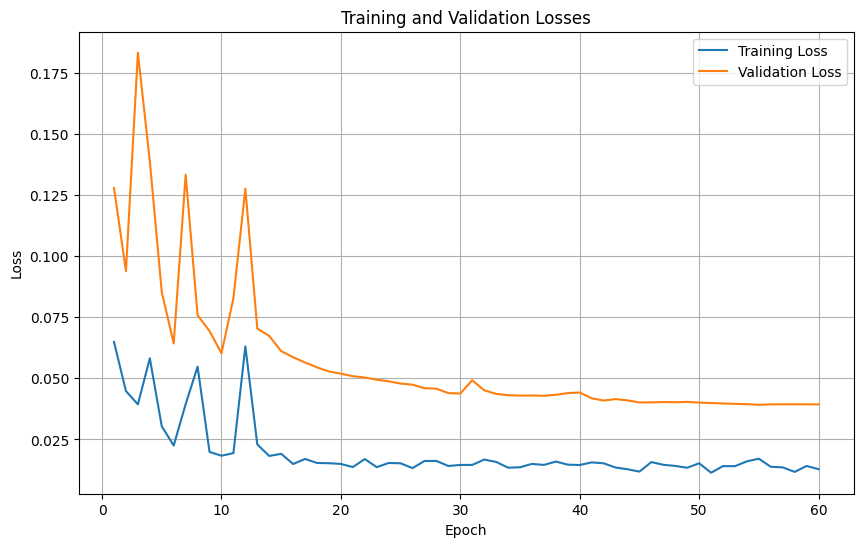

In [ ]:
import matplotlib.pyplot as plt

# plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def get_image_embedding(image_path):
  image = Image.open(image_path)
  # get the image ready for the model and save it to device
  # the processor returns a dictionary
  inputs = processor(images = image, return_tensors = 'pt', padding = True).to(device)
  # make it so you don't need to save gradients
  with torch.no_grad():
      image_features = model.get_image_features(**inputs)
  # return the image features, save it to CPU, convert it to a numpy array,
  # and flatten it to a vecetor
  return image_features.cpu().numpy().flatten()

In [ ]:
# get the image embeddings using the fine-tuned CLIP model
img_paths = image_paths('/content/')
img_embeddings = []

for image in img_paths:
  embedding = get_image_embedding(image)
  img_embeddings.append(embedding)

image_embeddings = np.array(img_embeddings)

In [ ]:
np.save('/content/drive/MyDrive/Logos/full_vector_db.npy', image_embeddings)